# Evaluation Project - 3

## HR Analytics Project- Understanding the Attrition in HR

#### Problem Statement:

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the  performance of employees?                  

* HR Analytics       
               
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.     
                 
* Attrition in HR   
              
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.            
                
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.              

* Attrition affecting Companies        
             
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [87]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report

In [28]:
# loading dataset and showing head of dataset

df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [29]:
# checking shape of dataset
df.shape

(1470, 35)

there are 1470 rows and 35 columns in the dataset

In [30]:
# checking null values 
df.isnull().sum().sum()

0

there is no null value in dataset

In [31]:
# checking duplicate value
df.duplicated().sum()

0

no duplicate row is present

In [32]:
# checking missing values
for i in df.columns:
    print(df.loc[df[i]==" "].sum().sum())
       

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


no missing value is present in any row

In [33]:
# checking stats of dataset
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


* employee_count has only one vlaue that is 1 is all the columns so i guess this is of no use 
* in monthly_income  columns max value is much high if i consider the difference in quantile range there might be outliers that is only few people getting very high salary and i will remove these outliers as they can miss lead the model prediction
* same probelm exist with NumCompaniesWorked that is there may be outliers as max value go suddenly high
* i guess StandardHours only have same values 80 so it may not have correlation with differt column i'll check it later
* TotalWorkingYears have also outliers but practically this data looks ture
* same with YearsAtCompany,YearsWithCurrManager,YearsSinceLastPromotion,YearsInCurrentRole as with TotalWorkingYears i'll confirm this in visualisation part




In [34]:
# checking stats of columns contains objext data
df.describe(include = ['O'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


i guess data distribution is not good(imbalanced data) as out of 1470 values 1233 are No in attrition column and same problem exist with other columns i will recheck it in visualisation part

In [35]:
# converting object data into numerical by using label encoder
from sklearn.preprocessing import LabelEncoder
labenc = LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i] = labenc.fit_transform(df[i])

In [36]:
# checking 
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [37]:
# checking info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int32
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

all columns are converted into integer type

<AxesSubplot:>

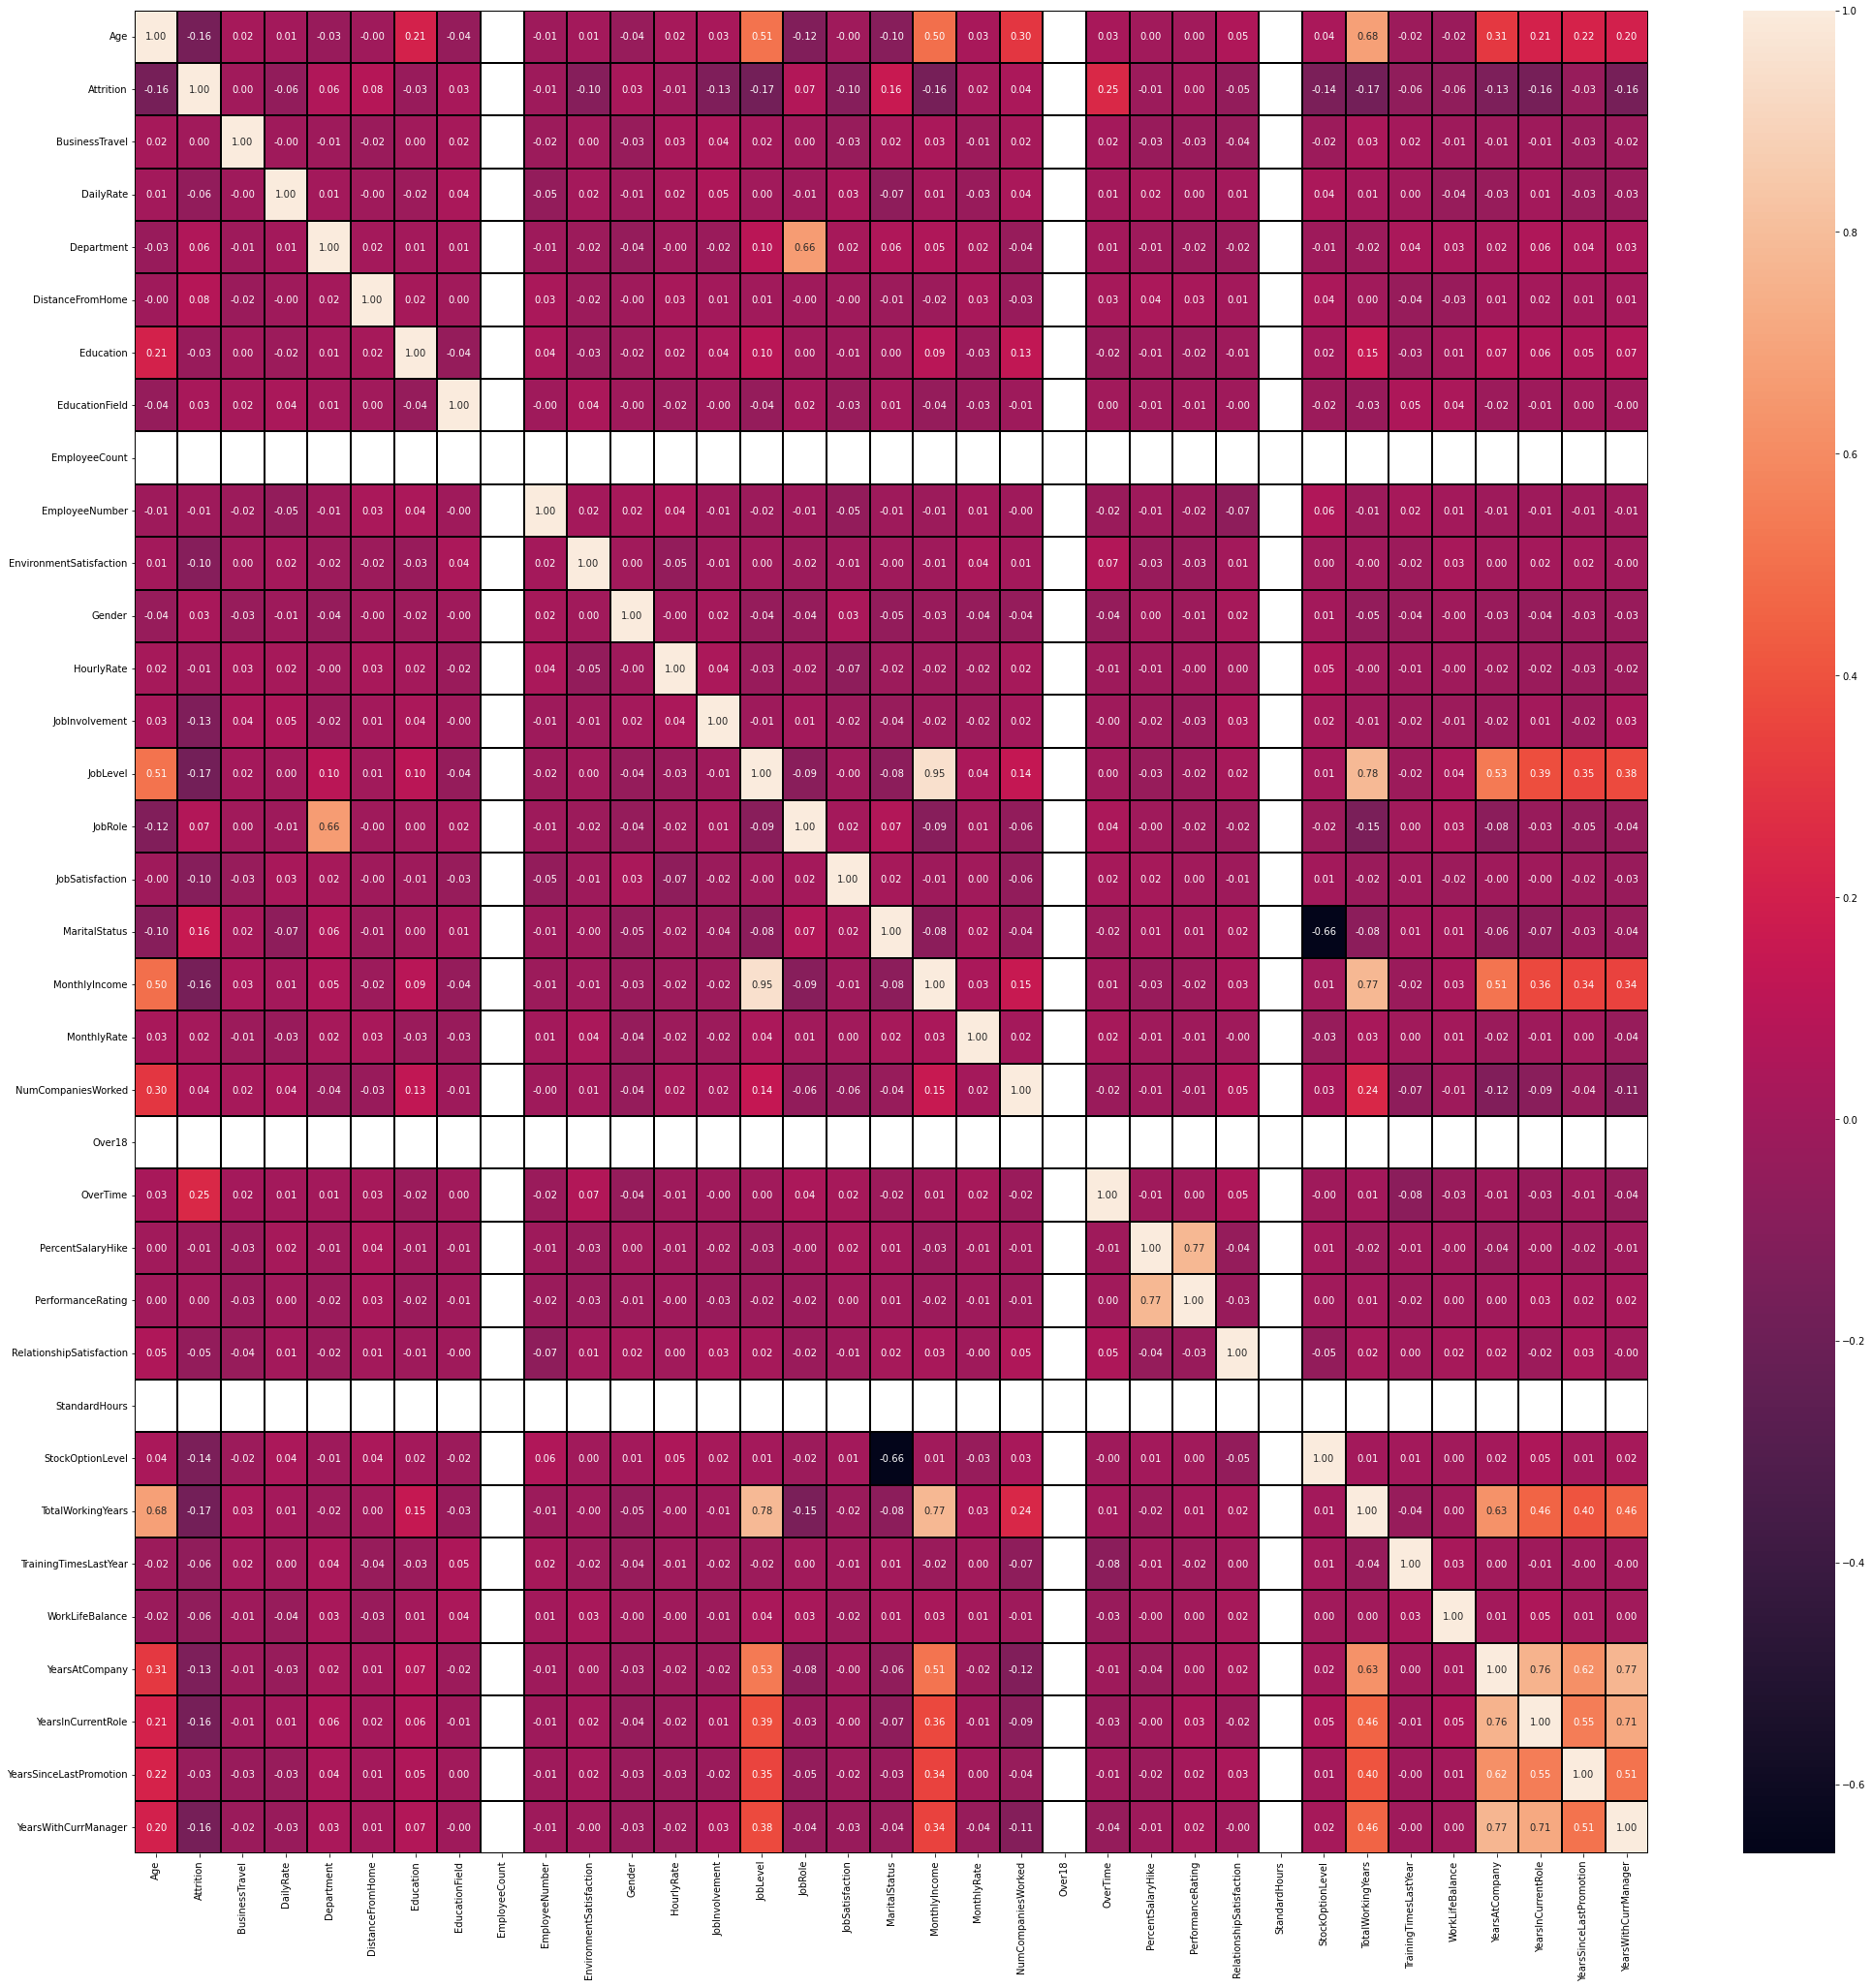

In [38]:
# checking correlation in columns using heatmap
plt.figure(figsize=(35,35))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linecolor='black',linewidths=0.1)

3 columns are blank they are not correlated to anyone let's remove them

In [39]:
# remvoing columns with 0 correlation
df = df.drop(columns=['Over18', 'StandardHours','EmployeeCount'])

<AxesSubplot:>

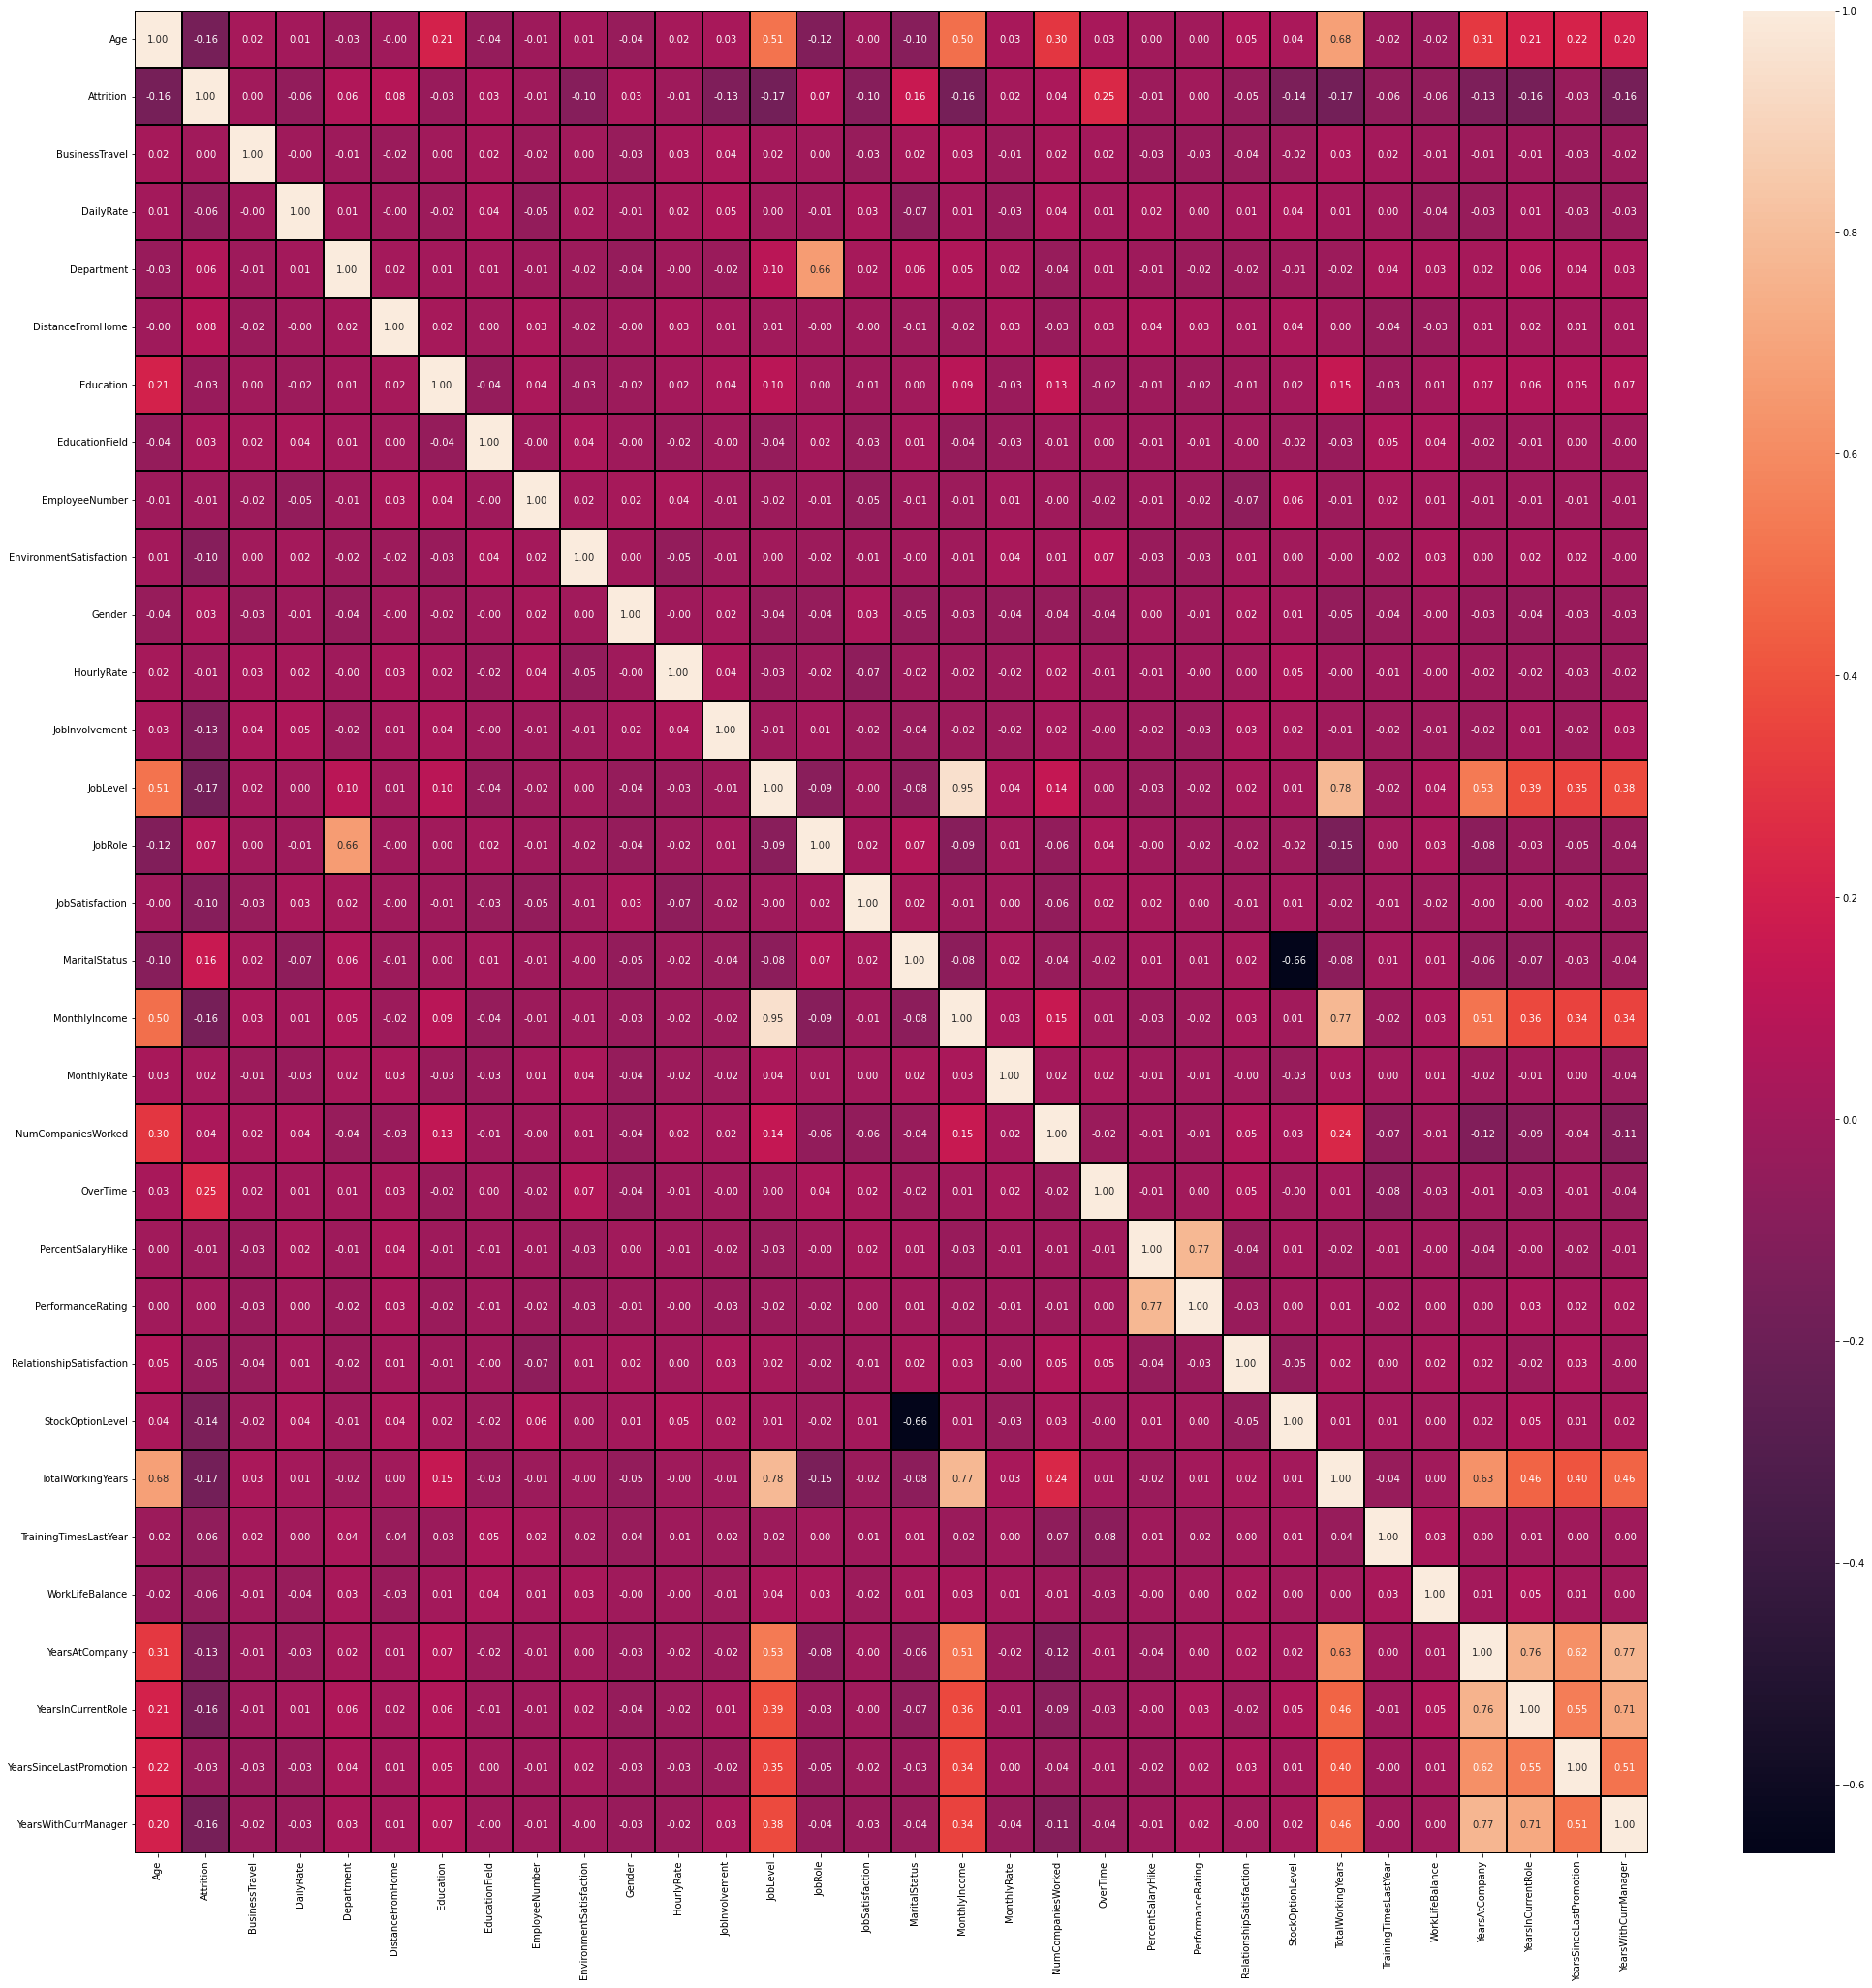

In [40]:
# checking correlation in columns using heatmap again
plt.figure(figsize=(35,35))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linecolor='black',linewidths=0.1)

* attrition is target column let's see from its prespective first
'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager' these columns as correlated to target column and with each other as well                            
So, i will choose 'YearsInCurrentRole' and 'TotalWorkingYears' as they are more correlated with attrition             
'OverTime' is highly correlated with attrition along all the columns                      
'MaritalStatus' and 'age' is also correlated with attrition


In [41]:
# removing unnecessary columns which are not correlated with target column
df = df.drop(columns=['BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked','PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'])

In [42]:
df

,Age,Attrition,EnvironmentSatisfaction,JobLevel,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,YearsInCurrentRole
0,41,1,2,2,2,5993,1,8,4
1,49,0,3,2,1,5130,0,10,7
2,37,1,4,1,2,2090,1,7,0
3,33,0,4,1,1,2909,1,8,7
4,27,0,1,1,1,3468,0,6,2
...,...,...,...,...,...,...,...,...,...
1465,36,0,3,2,1,2571,0,17,2
1466,39,0,4,3,1,9991,0,9,7
1467,27,0,2,2,1,6142,1,6,2
1468,49,0,4,2,1,5390,0,17,6


In [43]:
df.columns

Index(['Age', 'Attrition', 'EnvironmentSatisfaction', 'JobLevel',
       'MaritalStatus', 'MonthlyIncome', 'OverTime', 'TotalWorkingYears',
       'YearsInCurrentRole'],
      dtype='object')

In [48]:
# separating categotical and continuous columns for visualitaion
df_cat = df.drop(columns = ['Age',
        'MonthlyIncome', 'TotalWorkingYears',
       'YearsInCurrentRole'])
df_con = df.drop(columns = [ 'Attrition', 'EnvironmentSatisfaction', 'JobLevel',
       'MaritalStatus',  'OverTime'])

In [52]:
df_con.shape,df_cat.shape


((1470, 4), (1470, 5))

In [53]:
df.shape

(1470, 9)

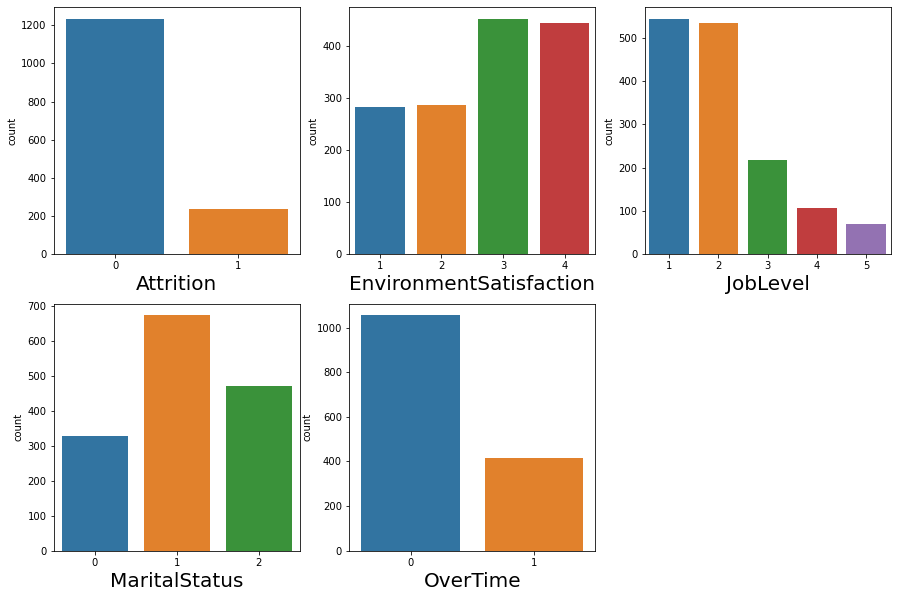

In [55]:
# checking data distribution in categorical columns
plt.figure(figsize=(15,10))
plot = 1
for column in df_cat:
    if plot<=5:
        ax = plt.subplot(2,3,plot)
        sns.countplot(x=column,data=df_cat)
        plt.xlabel(column,fontsize=20)
    plot+=1
plt.show()

* data is not looking imbalanced   


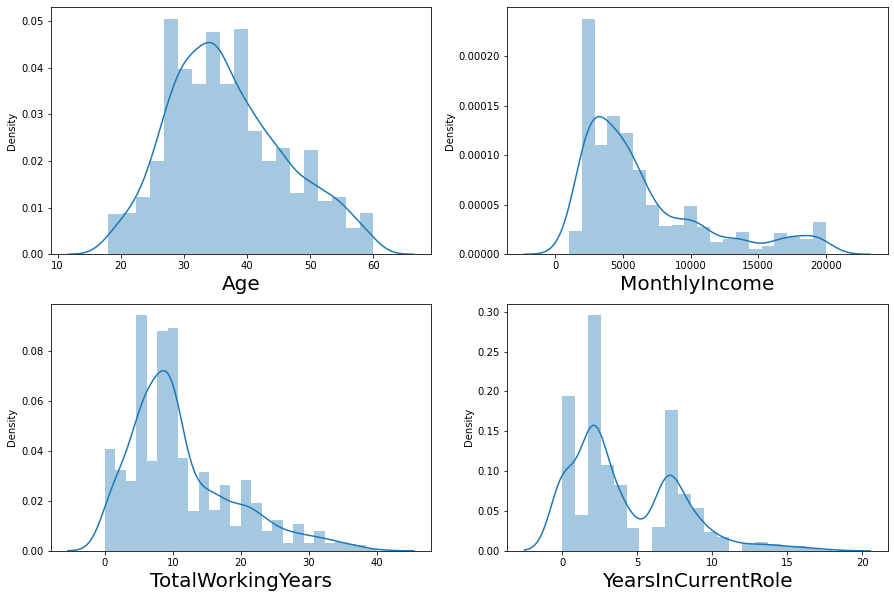

In [56]:
# checking distribution in continous columns
plt.figure(figsize=(15,10))
plot = 1
for column in df_con:
    if plot<=4:
        ax = plt.subplot(2,2,plot)
        sns.distplot(df_con[column])
        plt.xlabel(column,fontsize=20)
    plot+=1
plt.show()

Data is skewed in years in current role, monthly income, totalworkingyear

In [62]:
# removing skewness using 'yeo-johnson'
from sklearn.preprocessing import PowerTransformer

In [65]:
skewed = ['MonthlyIncome', 'TotalWorkingYears', 'YearsInCurrentRole']

In [64]:
df_con.columns

Index(['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsInCurrentRole'], dtype='object')

In [67]:
scaler = PowerTransformer(method='yeo-johnson')
df[skewed] = scaler.fit_transform(df[skewed].values)

In [74]:
# separating data into features and label
x = df.drop(columns = ['Attrition'])
y = df.Attrition

In [75]:
# scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# model building

### LogisticRegression

In [78]:
lr = LogisticRegression()

In [80]:
# searching best random state to get best train and test accuracy
from sklearn.metrics import r2_score
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    print(f"at random state {i},the training accuracy is : ,{lr.score(x_train,y_train)}")
    print(f"at random state {i},the testing accuracy is : ,{lr.score(x_test,y_test)}")
    print("\n")

at random state 0,the training accuracy is : ,0.8602540834845736
at random state 0,the testing accuracy is : ,0.8695652173913043


at random state 1,the training accuracy is : ,0.868421052631579
at random state 1,the testing accuracy is : ,0.8505434782608695


at random state 2,the training accuracy is : ,0.868421052631579
at random state 2,the testing accuracy is : ,0.8532608695652174


at random state 3,the training accuracy is : ,0.8647912885662432
at random state 3,the testing accuracy is : ,0.8505434782608695


at random state 4,the training accuracy is : ,0.867513611615245
at random state 4,the testing accuracy is : ,0.8505434782608695


at random state 5,the training accuracy is : ,0.867513611615245
at random state 5,the testing accuracy is : ,0.8505434782608695


at random state 6,the training accuracy is : ,0.8620689655172413
at random state 6,the testing accuracy is : ,0.8641304347826086


at random state 7,the training accuracy is : ,0.8666061705989111
at random state 7,the 

i checked manually and find best random state 36 as here model test and train accuracy is same

In [84]:
# training the model with 36 random state
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=36)


In [85]:
# write one function and call as many as times to check accuracy score of different model
def metric_score(clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print("\n==================== Train Result =======================")
        
        print(f"Accuracy score :{accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train==False:
        pred = clf.predict(x_test)
        
        print("\n===================== Test Result =======================")
        
        print(f"Accuracy score :{accuracy_score(y_test, pred)*100:.2f}%")
        
        print('\n \n Test Classification Report \n',classification_report(y_test, pred,digits=2))

In [88]:
clf = LogisticRegression()

# train the model
clf.fit(x_train,y_train)

# call the function and pass dataset to check the train and test score
metric_score(clf,x_train,x_test,y_train,y_test, train=True) # for tarining score

metric_score(clf,x_train,x_test,y_train,y_test, train=False) # for testing score


==================== Train Result =======================
Accuracy score :86.48%

===================== Test Result =======================
Accuracy score :86.41%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       309
           1       0.71      0.25      0.38        59

    accuracy                           0.86       368
   macro avg       0.79      0.62      0.65       368
weighted avg       0.85      0.86      0.84       368



model accuracy is 86% which is good 

In [89]:
con_mat = confusion_matrix(y_test,y_pred)
con_mat

array([[303,   6],
       [ 44,  15]], dtype=int64)

In [92]:
# checking model is over fitting or not
from sklearn.model_selection import KFold,cross_val_score
cross_val_score(lr,x,y,cv=10)
cross_val_score(lr,x,y,cv=10).mean()

0.8605442176870749

model is not over fitting as accuracy and cross val score is same

In [94]:
# hyper parameter tuning
drid_param = {
    'penalty':['l1','l2','elasticnet','none'],
    'C':np.logspace(-4,4,20),
    'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter':[100,1000,2500,5000]
}

In [95]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=log_reg,param_grid=drid_param,cv=5,
                           n_jobs=-1)

In [96]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']})

In [97]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'C': 0.0018329807108324356, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [113]:
# training data again with tuned parameter
log_reg = LogisticRegression(C=0.0018329807108324356,max_iter=100,penalty='l2',solver= 'liblinear')
log_reg.fit(x_train,y_train)

# checking the accuracy after tuning
metric_score(log_reg,x_train,x_test,y_train,y_test, train=True) # for tarining score
metric_score(log_reg,x_train,x_test,y_train,y_test, train=False) # for testing score


==================== Train Result =======================
Accuracy score :86.12%

===================== Test Result =======================
Accuracy score :86.68%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       309
           1       0.78      0.24      0.36        59

    accuracy                           0.87       368
   macro avg       0.82      0.61      0.64       368
weighted avg       0.86      0.87      0.84       368



acccuracy is increased by 0.20% i guess model randomly used best parameter itself

### Decision tree

In [115]:
# training model with decision tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [116]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True) # for tarining score
metric_score(clf,x_train,x_test,y_train,y_test, train=False) # for testing score


==================== Train Result =======================
Accuracy score :100.00%

===================== Test Result =======================
Accuracy score :75.82%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.83      0.85       309
           1       0.31      0.41      0.35        59

    accuracy                           0.76       368
   macro avg       0.59      0.62      0.60       368
weighted avg       0.79      0.76      0.77       368



using decision tree model learn 100% but giving less accuracy 

In [117]:
# cross validation of model 
# checking model is over fitting or not
from sklearn.model_selection import KFold,cross_val_score
cross_val_score(clf,x,y,cv=10)
cross_val_score(clf,x,y,cv=10).mean()

0.7591836734693876

model is not over fitting

In [119]:
# hyper parameter tuning
drid_param = {
    'criterion':['gini','entropy'],
    'max_depth': range(10,20),
    'min_samples_leaf': range(2,20),
    'min_samples_split': range(3,20),
    'max_leaf_nodes': range(5,20)
}

In [120]:
grid_search = GridSearchCV(estimator=clf,param_grid=drid_param,cv=5,
                           n_jobs=-1)

In [121]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 20),
                         'max_leaf_nodes': range(5, 20),
                         'min_samples_leaf': range(2, 20),
                         'min_samples_split': range(3, 20)})

In [122]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 7, 'min_samples_leaf': 9, 'min_samples_split': 3}


In [144]:
# initaiting DecisionTreeClassifier with new parameters and train
clf = DecisionTreeClassifier(criterion = 'gini',min_samples_split=2,max_depth=10,min_samples_leaf=9,max_leaf_nodes=7)
# train the model
clf.fit(x_train,y_train)

# call the function and pass dataset to check the train and test score
metric_score(clf,x_train,x_test,y_train,y_test, train=True) # for tarining score

metric_score(clf,x_train,x_test,y_train,y_test, train=False) # for testing score


==================== Train Result =======================
Accuracy score :86.39%

===================== Test Result =======================
Accuracy score :85.05%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       309
           1       0.62      0.17      0.27        59

    accuracy                           0.85       368
   macro avg       0.74      0.58      0.59       368
weighted avg       0.82      0.85      0.81       368



accuracy incerased by 10% 

### AdaBoost

In [146]:
# training data with adaboost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)

# checking tain and test accuracy
metric_score(ada,x_train,x_test,y_train,y_test, train=True) # for tarining score

metric_score(ada,x_train,x_test,y_train,y_test, train=False) # for testing score


==================== Train Result =======================
Accuracy score :87.48%

===================== Test Result =======================
Accuracy score :86.14%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       309
           1       0.63      0.32      0.43        59

    accuracy                           0.86       368
   macro avg       0.76      0.64      0.67       368
weighted avg       0.84      0.86      0.84       368



adaboost learn better than above model let's check cross_val_score

In [147]:
# cross validation of model 
# checking model is over fitting or not
cross_val_score(ada,x,y,cv=10)
cross_val_score(ada,x,y,cv=10).mean()

0.8523809523809524

model is not ovrfitting 

In [150]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[10,20,47,50,60,70,90,100], 'learning_rate':[0.25,0.30,0.40]}
grid_srch = GridSearchCV(AdaBoostClassifier(),cv=5,param_grid = params)
grid_srch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.25, 0.3, 0.4],
                         'n_estimators': [10, 20, 47, 50, 60, 70, 90, 100]})

In [151]:
grid_srch.best_estimator_

AdaBoostClassifier(learning_rate=0.3, n_estimators=60)

In [164]:
ada = AdaBoostClassifier(learning_rate=0.28,n_estimators=100)
ada.fit(x_train,y_train)

# checking accuracy after parameter tuning
metric_score(ada,x_train,x_test,y_train,y_test, train=True) # for tarining score
metric_score(ada,x_train,x_test,y_train,y_test, train=False) # for testing score


==================== Train Result =======================
Accuracy score :87.02%

===================== Test Result =======================
Accuracy score :87.23%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       309
           1       0.75      0.31      0.43        59

    accuracy                           0.87       368
   macro avg       0.82      0.64      0.68       368
weighted avg       0.86      0.87      0.85       368



Adaboost model is giving accuracy 87% where it learns 87% and f1-score recall all are better than above models

### Knn

In [166]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

metric_score(knn,x_train,x_test,y_train,y_test, train=True) # for tarining score
metric_score(knn,x_train,x_test,y_train,y_test, train=False) # for testing score


==================== Train Result =======================
Accuracy score :86.75%

===================== Test Result =======================
Accuracy score :83.70%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       309
           1       0.48      0.22      0.30        59

    accuracy                           0.84       368
   macro avg       0.67      0.59      0.61       368
weighted avg       0.80      0.84      0.81       368



accuracy is not much if i see all models let's chcek cross val score

In [167]:
# cross validation of model 
# checking model is over fitting or not
cross_val_score(knn,x,y,cv=10)
cross_val_score(knn,x,y,cv=10).mean()

0.8414965986394558

model is not overfitting

In [168]:
# hyperparameter tuning
param_drid = {'algorithm': ['kd_tree','brute'],
             'leaf_size':[3,4,5,6,7,8],
             'n_neighbors':[3,4,7,9,11,13]
             }
gridsearch = GridSearchCV(estimator=knn, param_grid=param_drid)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 13}

In [172]:
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 3, n_neighbors=13)
knn.fit(x_train,y_train)

# checking accuracy
metric_score(knn,x_train,x_test,y_train,y_test, train=True) # for tarining score
metric_score(knn,x_train,x_test,y_train,y_test, train=False) # for testing score


==================== Train Result =======================
Accuracy score :85.84%

===================== Test Result =======================
Accuracy score :85.33%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       309
           1       0.62      0.22      0.33        59

    accuracy                           0.85       368
   macro avg       0.74      0.60      0.62       368
weighted avg       0.83      0.85      0.82       368



accuracy is 85% which is less than above models

### SVM

In [174]:
# svm
from sklearn.svm import SVC
svc = SVC()

# model training and score
svc.fit(x_train,y_train)

# call the function
# call the function and pass the dataset
metric_score(svc,x_train,x_test,y_train,y_test, train=True) # training score
metric_score(svc,x_train,x_test,y_train,y_test, train=False) # testing score


==================== Train Result =======================
Accuracy score :86.48%

===================== Test Result =======================
Accuracy score :85.05%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       309
           1       0.67      0.14      0.23        59

    accuracy                           0.85       368
   macro avg       0.76      0.56      0.57       368
weighted avg       0.83      0.85      0.81       368



In [175]:
# cross validation of model 
# checking model is over fitting or not
cross_val_score(svc,x,y,cv=10)
cross_val_score(svc,x,y,cv=10).mean()

0.8387755102040817

model is not overfittng and underfitting

In [176]:
# hyper parameter tuning
param_grid = {'C':[1,5,10,20],
              'gamma':[0.001,0.01,0.2,0.002]
             }
gridsearch = GridSearchCV(svc, param_grid)

gridsearch.fit(x_train,y_train)

# best param
gridsearch.best_params_

{'C': 1, 'gamma': 0.2}

In [188]:
# svm model training with new params and print score
svc = SVC(C=1,gamma=0.2)

# model training and score
svc.fit(x_train,y_train)

# call the function
# call the function and pass the dataset
metric_score(svc,x_train,x_test,y_train,y_test, train=True) # training score
metric_score(svc,x_train,x_test,y_train,y_test, train=False) # testing score



==================== Train Result =======================
Accuracy score :87.11%

===================== Test Result =======================
Accuracy score :84.24%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.98      0.91       309
           1       0.53      0.14      0.22        59

    accuracy                           0.84       368
   macro avg       0.69      0.56      0.56       368
weighted avg       0.80      0.84      0.80       368



model is not giving best result

findfont: Font family ['size=10'] not found. Falling back to DejaVu Sans.


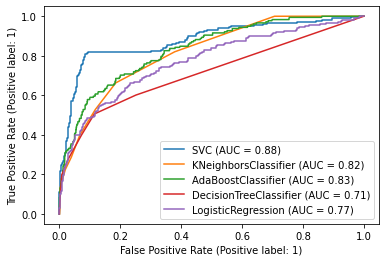

In [190]:
# how well our model works on training data
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(svc,x_train,y_train)

plot_roc_curve(knn,x_train,y_train,ax = disp.ax_)  # axis with confusion matrix

plot_roc_curve(ada,x_train,y_train,ax = disp.ax_)

plot_roc_curve(clf,x_train,y_train,ax = disp.ax_)

plot_roc_curve(log_reg,x_train,y_train,ax = disp.ax_)

plt.legend(prop='size=10', loc='lower right')

plt.show()

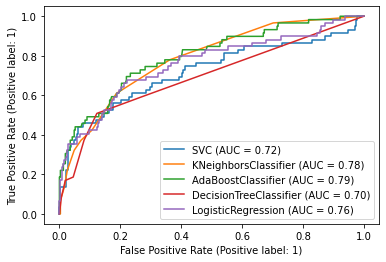

In [191]:
# how well our model works on test data
disp = plot_roc_curve(svc,x_test,y_test)

plot_roc_curve(knn,x_test,y_test,ax = disp.ax_)  # axis with confusion matrix

plot_roc_curve(ada,x_test,y_test,ax = disp.ax_)

plot_roc_curve(clf,x_test,y_test,ax = disp.ax_)

plot_roc_curve(log_reg,x_test,y_test,ax = disp.ax_)

plt.legend(prop='size=10', loc='lower right')

plt.show()

i select AdaBoost model as area under the curve is more for this model and also it is giving maximum accuracy

In [193]:
# saving the best model
import pickle
filename = 'HR'
pickle.dump(ada, open(filename,'wb'))